In [1]:
import re
from pandas import DataFrame
import numpy as np
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Kkma
import nltk
kkma = Kkma()
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [2]:
#csv 불러오기
df = pd.read_csv('C:/Users/User/Desktop/기획경영_전처리/전략기획.csv',encoding = 'utf-8')
df

,주요 업무,자격요건 및 우대사항
0,솔루션 및 프로젝트 기획 콘셉트와 내외부의 문제 요구 사항 필요한 기능 등 정의...,해당 직무에서 2 년 이상 경험을 보유하시고 스토리보드 작성이 가능하신 분 수단...
1,VitalCare 서비스 기획 웹 UIUX설계 시스템 구축에 대한 요구사항 분석 ...,웹 서비스 기획 및 운영 5년 이상 경력 유저 스토리 기반의 요구사항을 기반으로 ...
2,온라인 마케팅 자동화 플랫폼 서비스 기획 및 운영 사용자의 문제를 정의하고 해결하...,3년 이상의 웹 서비스 기획 경험이 있는 분 IA 설계 와이어프레임 Flow Ch...
3,프로젝트 매니징 업무 자사 서비스웹모바일 신규 기획 및 개선 데이터 분석 경쟁사 ...,웹모바일 기획 경력 5년 이상 PM 경력 보유자 B2C 플랫폼 경험 포트폴리오 제...
4,IT Vendor 및 사업계획 관리정보화 전략계획수립 시스템 TO_BE 구성안 수...,학력 4년제 대졸 이상경력 업무경력 10년 이상ERPWMS 운영 및 PM경력자I...
...,...,...
103,피트니스 선도사업자 산업 리서치를 통한 기획 및 적용 보유 직영점파일럿매장을 토대...,선도적인 피트니스 산업을 이해하고 이를 현실화 할 수 있는 분 고객 중심 마케팅에...
104,Haulla의 miniCEO 기업 가치 증대 혹은 고객 가치 증대를 위한 모든...,필수 똘똘한 사람 경력경험은 없어도 괜찮음 논리적이며 분석적인 지적 토론이 가능...
105,CEO Staff 는 미소의 CEO와 직접 일할수 있는 좋은 기회를 가지고 있습니다...,이런 분과 함께하고 싶습니다 높은 책임감을 가지고 CEO와 언제든 문제를 해결할 수...
106,중장기 사업 전략 및 실행계획 수립 신규사업 및 신규 시장해외의 발굴 및 사업성 ...,기업의 중장기적인 성장과 발전을 위해 기업환경 변화를 예측하고 분석하여 혁신적인 ...


In [3]:
#사용할 column 선택
df = df[['주요 업무']]
df

,주요 업무
0,솔루션 및 프로젝트 기획 콘셉트와 내외부의 문제 요구 사항 필요한 기능 등 정의...
1,VitalCare 서비스 기획 웹 UIUX설계 시스템 구축에 대한 요구사항 분석 ...
2,온라인 마케팅 자동화 플랫폼 서비스 기획 및 운영 사용자의 문제를 정의하고 해결하...
3,프로젝트 매니징 업무 자사 서비스웹모바일 신규 기획 및 개선 데이터 분석 경쟁사 ...
4,IT Vendor 및 사업계획 관리정보화 전략계획수립 시스템 TO_BE 구성안 수...
...,...
103,피트니스 선도사업자 산업 리서치를 통한 기획 및 적용 보유 직영점파일럿매장을 토대...
104,Haulla의 miniCEO 기업 가치 증대 혹은 고객 가치 증대를 위한 모든...
105,CEO Staff 는 미소의 CEO와 직접 일할수 있는 좋은 기회를 가지고 있습니다...
106,중장기 사업 전략 및 실행계획 수립 신규사업 및 신규 시장해외의 발굴 및 사업성 ...


In [4]:
#txt로 저장
i = 'C:/Users/User/Desktop/기획경영_전처리/전략기획(주요업무).txt'
df.to_csv(i, sep = "\t", index = False, encoding='utf-8')

In [5]:
from konlpy.corpus import kobill
doc_ko = open(i, encoding='utf-8').read()
doc_ko

'주요 업무\n 솔루션 및 프로젝트 기획  콘셉트와 내외부의 문제 요구 사항 필요한 기능 등 정의  초기 기획을 위해 구현하고자 하는 기술을 분석하고 고도화를 위한 방안 모색  기획한 바에 대한 일정 및 로드맵 수립 및 고도화 과정 전반 관여\n VitalCare 서비스 기획 웹 UIUX설계 시스템 구축에 대한 요구사항 분석 및 개선사항 도출 프로세스 및 정책 수립\n 온라인 마케팅 자동화 플랫폼 서비스 기획 및 운영 사용자의 문제를 정의하고 해결하는 서비스 전략의 설계 프로젝트의 성과 지표를 정의하고 타 포지션의 동료들과 협업해 프로젝트 운영 Customer Success 팀과의 커뮤니케이션 통해 고객의 성공을 위한 서비스 점검 및 개선\n 프로젝트 매니징 업무 자사 서비스웹모바일 신규 기획 및 개선 데이터 분석 경쟁사 분석 등을 통한 인사이트 발굴\nIT Vendor 및 사업계획 관리정보화 전략계획수립  시스템 TO_BE 구성안 수립IT타당성 검토 및 효과분석IT도입 및 운영관리  프로젝트 Management비즈니스 프로세스 분석 업무 수행ERP  BSI JDE legacy System 운영신규 ERP 프로젝트 관리infra  AWSAmazon Web ServicesDB  mysqlsystem  java spring boot\n 미래에 가장 부가가치 높은 기술스킬노하우 교육 상품 런칭의 A to Z를 진행합니다 주제에 대한 시장성을 분석하고 리포트를 작성합니다 학습자 고객관점의 강의 콘텐츠의 컨셉과 내용을 기획하고 커리큘럼을 구성합니다 영상 콘텐츠 제작을 관리하고 콘텐츠 퀄리티 검수를 담당합니다 업계 TopTier 연사를 섭외합니다 마케터와 협업해 코스를 런칭합니다신입의 경우 PM과 함께 기획 단계에 참여하여 기획력을 습득하고 전반적인 운영관리 업무를 담당하는 APMAssistant PM으로 시작하게 됩니다\n 쿡앱스에서 앞으로 담당하실 업무예요 쿡앱스 사업지원팀에서 팀배틀 RPG 장르의 프로젝트 무명기사단을 글로벌 시장에 맞춰 서브컬쳐향으로 리메이크 합니

In [6]:
from konlpy.tag import Okt; t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['주요',
 '업무',
 '솔루션',
 '및',
 '프로젝트',
 '기획',
 '콘셉트',
 '외부',
 '문제',
 '요구',
 '사항',
 '기능',
 '등',
 '정의',
 '초기',
 '기획',
 '위해',
 '구현',
 '기술',
 '분석',
 '고도화',
 '위',
 '방안',
 '모색',
 '기획',
 '바',
 '대한',
 '일정',
 '및',
 '로드맵',
 '수립',
 '및',
 '고도화',
 '과정',
 '전반',
 '관여',
 '서비스',
 '기획',
 '웹',
 '설계',
 '시스템',
 '구축',
 '대한',
 '요구사항',
 '분석',
 '및',
 '개선',
 '사항',
 '도출',
 '프로세스',
 '및',
 '정책',
 '수립',
 '온라인',
 '마케팅',
 '자동화',
 '플랫폼',
 '서비스',
 '기획',
 '및',
 '운영',
 '사용자',
 '문제',
 '정의',
 '해결',
 '서비스',
 '전략',
 '설계',
 '프로젝트',
 '성과',
 '지표',
 '정의',
 '타',
 '포지션',
 '동료',
 '협업',
 '프로젝트',
 '운영',
 '팀',
 '커뮤니케이션',
 '통해',
 '고객',
 '성공',
 '위',
 '서비스',
 '점검',
 '및',
 '개선',
 '프로젝트',
 '매니',
 '징',
 '업무',
 '자사',
 '서비스',
 '웹',
 '모바일',
 '신규',
 '기획',
 '및',
 '개선',
 '데이터',
 '분석',
 '경쟁',
 '사',
 '분석',
 '등',
 '통한',
 '인사이트',
 '발굴',
 '및',
 '사업',
 '계획',
 '관리',
 '정보화',
 '전략',
 '계획',
 '수립',
 '시스템',
 '성안',
 '수립',
 '타당성',
 '검토',
 '및',
 '효과',
 '분석',
 '도입',
 '및',
 '운영',
 '관리',
 '프로젝트',
 '비즈니스',
 '프로세스',
 '분석',
 '업무',
 '수행',
 '운영',
 '신규',
 '프로젝트',
 '관리',
 

In [7]:
ko = nltk.Text(tokens_ko, name = 'work')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

4961
685


FreqDist({'및': 324, '사업': 199, '전략': 128, '수립': 126, '기획': 123, '분석': 117, '관리': 84, '운영': 81, '등': 76, '기술': 62, ...})

In [8]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [12]:
stop_words = [
    '사업','서비스','신규','업무','사','경력','분','및','해결', '일', '등', '직', '더', '위', '수', '팀', '자사', '마','피', '내']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['주요',
 '솔루션',
 '프로젝트',
 '기획',
 '콘셉트',
 '외부',
 '문제',
 '요구',
 '사항',
 '기능',
 '정의',
 '초기',
 '기획',
 '위해',
 '구현',
 '기술',
 '분석',
 '고도화',
 '방안',
 '모색',
 '기획',
 '바',
 '대한',
 '일정',
 '로드맵',
 '수립',
 '고도화',
 '과정',
 '전반',
 '관여',
 '기획',
 '웹',
 '설계',
 '시스템',
 '구축',
 '대한',
 '요구사항',
 '분석',
 '개선',
 '사항',
 '도출',
 '프로세스',
 '정책',
 '수립',
 '온라인',
 '마케팅',
 '자동화',
 '플랫폼',
 '기획',
 '운영',
 '사용자',
 '문제',
 '정의',
 '전략',
 '설계',
 '프로젝트',
 '성과',
 '지표',
 '정의',
 '타',
 '포지션',
 '동료',
 '협업',
 '프로젝트',
 '운영',
 '커뮤니케이션',
 '통해',
 '고객',
 '성공',
 '점검',
 '개선',
 '프로젝트',
 '매니',
 '징',
 '웹',
 '모바일',
 '기획',
 '개선',
 '데이터',
 '분석',
 '경쟁',
 '분석',
 '통한',
 '인사이트',
 '발굴',
 '계획',
 '관리',
 '정보화',
 '전략',
 '계획',
 '수립',
 '시스템',
 '성안',
 '수립',
 '타당성',
 '검토',
 '효과',
 '분석',
 '도입',
 '운영',
 '관리',
 '프로젝트',
 '비즈니스',
 '프로세스',
 '분석',
 '수행',
 '운영',
 '프로젝트',
 '관리',
 '미래',
 '가장',
 '부가가치',
 '기술',
 '스킬',
 '노하우',
 '교육',
 '상품',
 '런칭',
 '를',
 '진행',
 '주제',
 '대한',
 '시장',
 '분석',
 '리포트',
 '작성',
 '학습자',
 '고객',
 '관점',
 '강의',
 '콘텐츠',
 '컨셉',
 '내용',
 '기획',
 '커리큘럼',
 '구성',
 '영

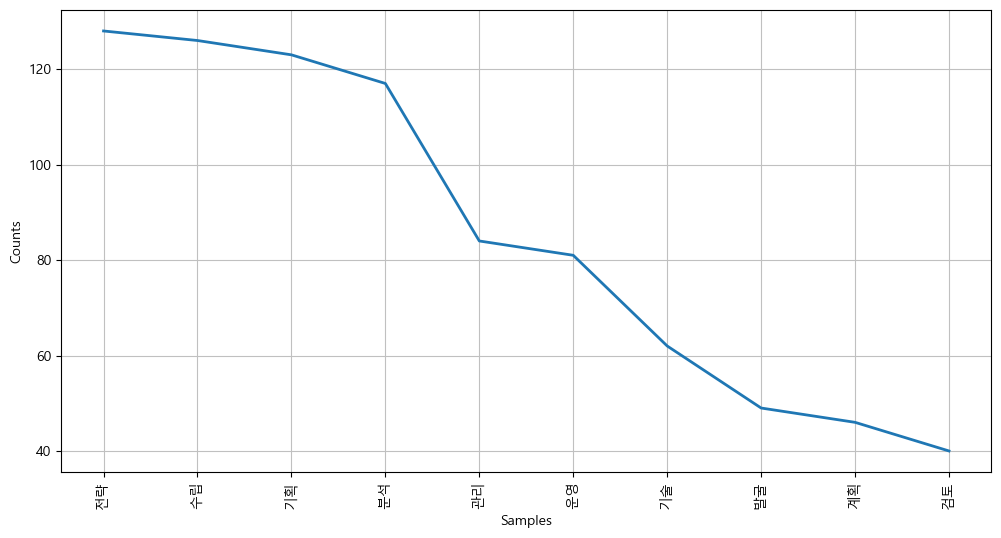

In [13]:
ko = nltk.Text(ko, name= 'Work')
plt.figure(figsize=(12,6))
ko.plot(10)
plt.show()

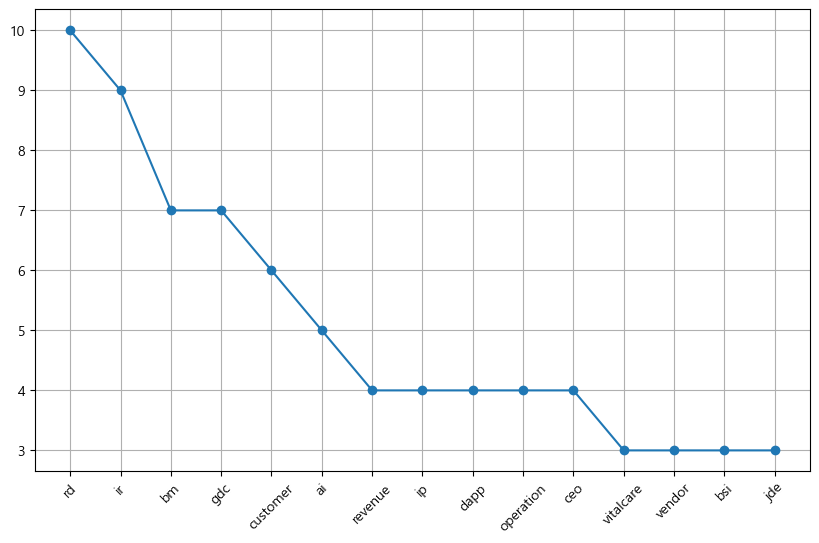

In [15]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from nltk.corpus import stopwords

# NLTK 불용어 목록 로드
stop_words = set(stopwords.words('english'))

#불용어 목록 추가
user_defined_stopwords = ['success','problem','solving','restful','office','back','service','skill','tool']
stop_words.update(user_defined_stopwords)

# 파일에서 텍스트를 읽는 함수
def read_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# 텍스트를 영어 단어로만 토큰화하는 함수
def tokenize(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# 단어 빈도를 줄 그래프로 그리는 함수
def plot_word_frequencies(frequencies):
    sorted_words = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

    words = [word for word, count in sorted_words[:15]]
    counts = [count for word, count in sorted_words[:15]]

    plt.figure(figsize=(10, 6))
    plt.plot(words, counts, marker='o')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


# 메인 스크립트
file_name = i
text = read_file(file_name)
words = tokenize(text)
word_frequencies = Counter(words)
plot_word_frequencies(word_frequencies)